# Plan Results

In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
colors = sns.color_palette()

sys.path.append('../../src')
import raybay
import analyze

### Approved Plan

In [2]:
approved = np.load('approved/res_approved.pkl', allow_pickle=True)

In [3]:
approved.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,PTV pln,MinDose,4800,NaN,NaN,1


In [4]:
approved.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall,MaxDvh,AtMost,3000,3.90
1,D2cm,MaxDose,AtMost,3000,NaN
2,Esophagus,MaxDvh,AtMost,1880,12.02
3,Lungs,MaxDvh,AtMost,1160,41.98
4,Lungs,MaxDvh,AtMost,1240,27.99
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,1.10
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,1.65


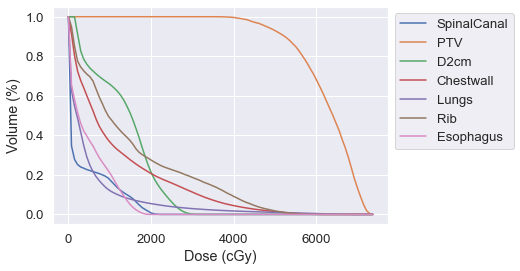

In [5]:
approved.dvhplot()

### Default Plan

In [6]:
default = np.load('default/res_default.pkl', allow_pickle=True)

In [7]:
default.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Chestwall,MaxDvh,3000,3.9,NaN,1
1,D2cm,MaxDose,3000,0.0,NaN,1
2,Esophagus,MaxDvh,1880,12.02,NaN,1
3,Lungs,MaxDvh,1160,41.98,NaN,1
4,Lungs,MaxDvh,1240,27.99,NaN,1
5,PTV,MinDvh,4800,95.0,NaN,1
6,PTV,MaxDose,8000,0.0,NaN,1
7,Rib,MaxDvh,3200,1.1,NaN,1
8,Rib,MaxDose,4000,0.0,NaN,1
9,SpinalCanal,MaxDvh,1360,1.65,NaN,1


In [8]:
default.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall,MaxDvh,AtMost,3000,3.90
1,D2cm,MaxDose,AtMost,3000,NaN
2,Esophagus,MaxDvh,AtMost,1880,12.02
3,Lungs,MaxDvh,AtMost,1160,41.98
4,Lungs,MaxDvh,AtMost,1240,27.99
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,1.10
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,1.65


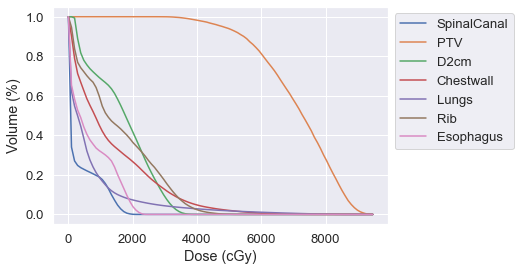

In [9]:
default.dvhplot()

### Optimized Plan

In [10]:
bayes_linquad = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)

In [11]:
bayes_linquad.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Chestwall,MaxDvh,"[750.0, 3000.0]",3.9,NaN,1
1,D2cm,MaxDose,"[750.0, 3000.0]",0.0,NaN,1
2,Esophagus,MaxDvh,"[470.0, 1880.0]",12.02,NaN,1
3,Lungs,MaxDvh,"[290.0, 1160.0]",41.98,NaN,1
4,Lungs,MaxDvh,"[310.0, 1240.0]",27.99,NaN,1
5,PTV,MinDvh,4800.0,95.0,NaN,1
6,PTV,MaxDose,"[5600.0, 8000.0]",0.0,NaN,1
7,Rib,MaxDvh,"[800.0, 3200.0]",1.1,NaN,1
8,Rib,MaxDose,"[1000.0, 4000.0]",0.0,NaN,1
9,SpinalCanal,MaxDvh,"[340.0, 1360.0]",1.65,NaN,1


In [12]:
bayes_linquad.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue,Weight,Shape
0,Chestwall,MaxDvh,AtMost,3000,3.90,1,linear
1,D2cm,MaxDose,AtMost,3000,NaN,1,linear_quadratic
2,Esophagus,MaxDvh,AtMost,1880,12.02,1,linear_quadratic
3,Lungs,MaxDvh,AtMost,1160,41.98,1,linear_quadratic
4,Lungs,MaxDvh,AtMost,1240,27.99,1,linear_quadratic
5,PTV,MinDvh,AtLeast,4800,95.00,1,linear_quadratic
6,PTV,MaxDose,AtMost,8000,NaN,1,linear_quadratic
7,Rib,MaxDvh,AtMost,3200,1.10,1,linear
8,Rib,MaxDose,AtMost,4000,NaN,1,linear
9,SpinalCanal,MaxDvh,AtMost,1360,1.65,1,linear_quadratic


## Convergence

In [13]:
def plotConvergenceA(labels=True, legend=True):
    # Load data
    approved = np.load('approved/res_approved.pkl', allow_pickle=True)
    default = np.load('default/res_default.pkl', allow_pickle=True)
    bayes = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    
    # Plot convergence
    plt.plot([0, 100], [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0],
                       raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':', color=colors[1])
    plt.plot([0, 100], [raybay.get_utility(bayes.goal_df, default.goal_dict)[0],
                       raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':', color=colors[0])
    plt.plot(np.arange(1, 101), -np.minimum.accumulate(bayes.opt_result.func_vals), color=colors[2])
    
    # Add labels
    if labels:
        plt.xlabel('Iteration ($t$)')
        plt.ylabel('Linear-Quadratic Utility ($g$)')
        if legend:
            plt.legend(['Clinical', 'Default', 'Bayes'], loc='lower right')
    else:
        ylim = plt.ylim()
        plt.xticks(ticks=np.arange(0, 101, 20), labels=[])
        plt.yticks(ticks=plt.yticks()[0], labels=[])
        plt.ylim(ylim)
        if legend:
            plt.legend(['', '', ''], frameon=False, loc='lower right')

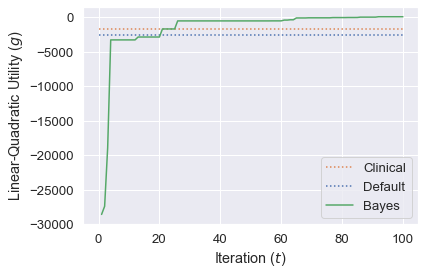

In [14]:
plotConvergenceA()

In [15]:
def plotConvergenceB(labels=True, legend=True, clinical=False):
    # Load data
    approved = np.load('approved/res_approved.pkl', allow_pickle=True)
    default = np.load('default/res_default.pkl', allow_pickle=True)
    bayes = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    
    # Plot convergence
    h2, = plt.plot(np.arange(20, 101), -np.minimum.accumulate(bayes.opt_result.func_vals)[19:], color=colors[2])
    ylim = plt.ylim()
    if clinical:
        h3, = plt.plot([20, 100], [raybay.get_utility(bayes.goal_df, approved.goal_dict)[0],
                 raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':', color=colors[1])
        h4, = plt.plot([20, 100], [raybay.get_utility(bayes.goal_df, default.goal_dict)[0],
                       raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':', color=colors[0])
    
    plt.ylim(ylim)
    # Add labels
    if labels:
        plt.xlabel('Iteration ($t$)')
        plt.ylabel('Linear-Quadratic Utility ($g$)')
        if legend:
            if clinical:
                plt.legend(['Bayes', 'Clinical', 'Default'], loc='lower right')
            else:
                plt.legend(['Bayes'], loc='lower right')
    else:
        #ylim = plt.ylim()
        plt.xticks(ticks=np.arange(20, 101, 20), labels=[])
        plt.yticks(ticks=plt.yticks()[0], labels=[])
        plt.ylim(ylim)
        if legend:
            if clinical:
                plt.legend([h3, h4, h2], ['', '', ''], loc='lower right', frameon=False)
            else:
                plt.legend([''], loc='lower right', frameon=False)

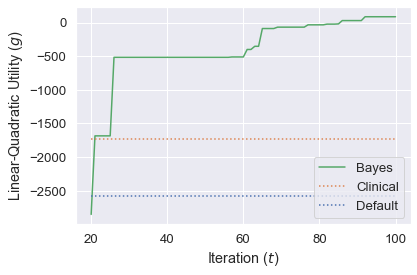

In [16]:
plotConvergenceB(clinical=True)

## Dose Values

In [17]:
# Load data
res_list = []
approved = np.load('approved/res_approved.pkl', allow_pickle=True)
bayes = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
temp = [approved, bayes]
res_list.append(temp)
roi_names = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'Lungs', 'PTV', 'PTV', 'Ribs', 'Ribs',
             'Spinal Cord', 'Spinal Cord']

(array([0.5, 1.5]), [Text(0, 0.5, 'Clinical'), Text(0, 1.5, 'Bayes')])

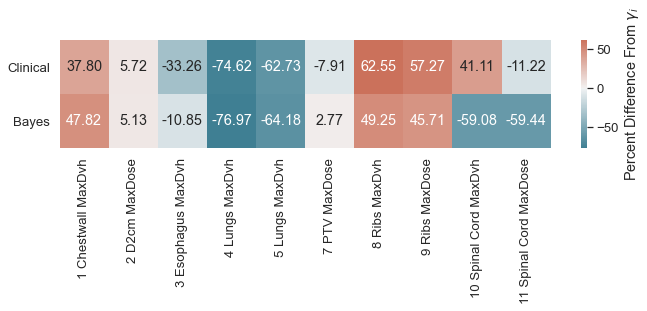

In [18]:
# Plot goal values (relative to gamma, normalized to PTV D95 = 4800 cGy)

# Calculate goal values
val_list = []
roi_dict = {}
for index, row in res_list[0][1].goal_df.iterrows():
    goal_vals = []
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[index]} {row['Type']}"] = index + 1
        for case in res_list:
            # Get indices of optimal values
            idx_max = [0]
            idx_max.append(np.argmin(case[1].opt_result.func_vals))
            
            # Get goal values
            for ii in range(len(case)):
                level = case[1].goal_df.iloc[index]['AcceptanceLevel']
                val = case[ii].goal_dict[index][idx_max[ii]]
                goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
            
# Plot results
columns = [f'{name}' for ii in range(1,2) for name in ['Clinical', 'Bayes']]
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), len(columns)))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From $\gamma_i$'}, ax=ax)
plt.yticks(rotation='horizontal')

(array([0.5, 1.5]), [Text(0, 0.5, 'Clinical'), Text(0, 1.5, 'Bayes')])

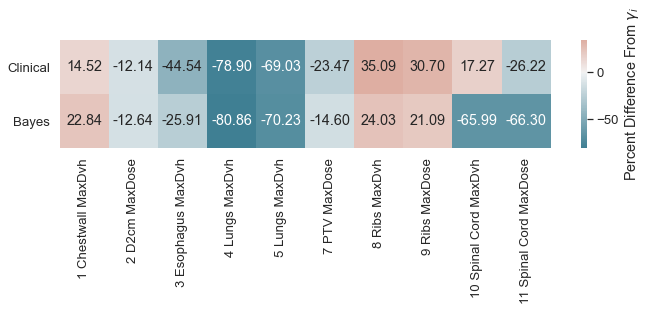

In [19]:
# Plot goal values (relative to gamma, normalized to PTV D95 = 3988.96 cGy)
coeff = 3988.96/4800.0

# Calculate goal values
val_list = []
roi_dict = {}
for index, row in res_list[0][1].goal_df.iterrows():
    goal_vals = []
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[index]} {row['Type']}"] = index + 1
        for case in res_list:
            # Get indices of optimal values
            idx_max = [0]
            idx_max.append(np.argmin(case[1].opt_result.func_vals))
            
            # Get goal values
            for ii in range(len(case)):
                level = case[1].goal_df.iloc[index]['AcceptanceLevel']
                val = coeff*case[ii].goal_dict[index][idx_max[ii]]
                goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
            
# Plot results
columns = [f'{name}' for ii in range(1,2) for name in ['Clinical', 'Bayes']]
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), len(columns)))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From $\gamma_i$'}, ax=ax)
plt.yticks(rotation='horizontal')

(array([0.5]), [Text(0, 0.5, 'Bayes')])

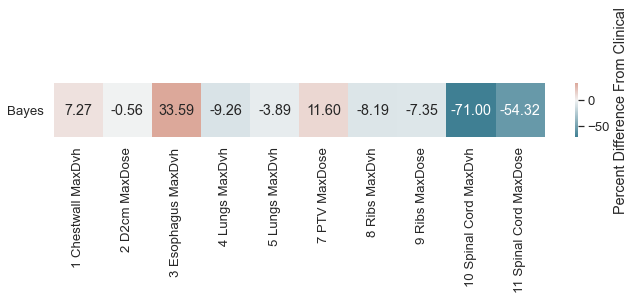

In [20]:
# Plot goal values (relative to clinical)

# Calculate goal values
val_list = []
roi_dict = {}
for index, row in res_list[0][1].goal_df.iterrows():
    goal_vals = []
    if index != 5:
        roi_dict[f"{index + 1} {roi_names[index]} {row['Type']}"] = index + 1
        for case in res_list:
            # Get indices of optimal values
            idx_max = [np.argmin(case[1].opt_result.func_vals)]
            
            # Get goal values
            for ii in [1]:
                level = case[0].goal_dict[index][0]
                val = case[ii].goal_dict[index][idx_max[ii - 1]]
                goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
            
# Plot results
columns = [f'{name}' for ii in range(1,2) for name in ['Bayes']]
val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
fig, ax = plt.subplots(1, figsize=(len(bayes.goal_df), len(columns)))
sns.heatmap(val_df.transpose(), cmap=sns.diverging_palette(220, 20, n=256), center=0,
            annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From Clinical'}, ax=ax)
plt.yticks(rotation='horizontal')

In [21]:
approved = res_list[0][0]
bayes_linquad = res_list[0][1]
for idx, row in bayes_linquad.goal_df.iterrows():
    goal = str(idx + 1) + ' ' + row['Roi'] + ' ' + row['Type']
    level = row['AcceptanceLevel']
    val_app = approved.goal_dict[idx][0]
    idx_max = np.argmin(bayes_linquad.opt_result.func_vals)
    val_bayes = bayes_linquad.goal_dict[idx][idx_max] 
    print(f'{goal} | {level} | {val_app:.2f} | {val_bayes:.2f} | {coeff*val_app:.2f} | {coeff*val_bayes:.2f} ')

1 Chestwall MaxDvh | 3000 | 4133.99 | 4434.58 | 3435.48 | 3685.29 
2 D2cm MaxDose | 3000 | 3171.67 | 3153.81 | 2635.76 | 2620.92 
3 Esophagus MaxDvh | 1880 | 1254.62 | 1676.01 | 1042.63 | 1392.82 
4 Lungs MaxDvh | 1160 | 294.46 | 267.18 | 244.70 | 222.03 
5 Lungs MaxDvh | 1240 | 462.15 | 444.18 | 384.06 | 369.13 
6 PTV MinDvh | 4800 | 4800.00 | 4800.00 | 3988.96 | 3988.96 
7 PTV MaxDose | 8000 | 7367.18 | 8221.47 | 6122.37 | 6832.32 
8 Rib MaxDvh | 3200 | 5201.73 | 4775.87 | 4322.81 | 3968.91 
9 Rib MaxDose | 4000 | 6290.98 | 5828.46 | 5228.01 | 4843.64 
10 SpinalCanal MaxDvh | 1360 | 1919.09 | 556.51 | 1594.83 | 462.48 
11 SpinalCanal MaxDose | 2600 | 2308.35 | 1054.44 | 1918.31 | 876.28 


Goal | AcceptanceLevel | Approved 4800 | Bayes 4800 | Approved 3989 | Bayes 3989
-|-|-|-|-|-
1 Chestwall MaxDvh | 3000 | 4133.99 | 4434.58 | 3435.48 | 3685.29 
2 D2cm MaxDose | 3000 | 3171.67 | 3153.81 | 2635.76 | 2620.92 
3 Esophagus MaxDvh | 1880 | 1254.62 | 1676.01 | 1042.63 | 1392.82 
4 Lungs MaxDvh | 1160 | 294.46 | 267.18 | 244.70 | 222.03 
5 Lungs MaxDvh | 1240 | 462.15 | 444.18 | 384.06 | 369.13 
6 PTV MinDvh | 4800 | 4800.00 | 4800.00 | 3988.96 | 3988.96 
7 PTV MaxDose | 8000 | 7367.18 | 8221.47 | 6122.37 | 6832.32 
8 Rib MaxDvh | 3200 | 5201.73 | 4775.87 | 4322.81 | 3968.91 
9 Rib MaxDose | 4000 | 6290.98 | 5828.46 | 5228.01 | 4843.64 
10 SpinalCanal MaxDvh | 1360 | 1919.09 | 556.51 | 1594.83 | 462.48 
11 SpinalCanal MaxDose | 2600 | 2308.35 | 1054.44 | 1918.31 | 876.28 

## Dose-Volume Histograms

In [22]:
def plotDvh(coeff=1.0, legend=True, labels=True):
    # Load data
    approved = np.load('approved/res_approved.pkl', allow_pickle=True)
    bayes = np.load('bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
        
    # Plot DVH
    names = list(approved.roi_list)
    names.sort()
    roi_names = ['Chestwall', 'D2cm', 'Esophagus', 'Lungs', 'PTV', 'Ribs', 'Spinal Cord']
    handles = []
    for ii, roi in enumerate(names):
        color = colors[ii]
        plt.plot(coeff*approved.dvh_dict['Dose']/100, 100*approved.dvh_dict[roi],':',color=color)
        p, = plt.plot(coeff*bayes.dvh_dict['Dose']/100, 100*bayes.dvh_dict[roi],color=color)
        handles.append(p)
        
    # Add labels
    if labels:
        plt.xlabel('Dose (Gy)')
        plt.ylabel('Volume (%)')
        if legend:
            plt.legend(handles, roi_names, bbox_to_anchor=(1, 1))
    else:
        xlim = plt.xlim()
        plt.xticks(ticks=plt.xticks()[0], labels=[])
        plt.yticks(ticks=np.arange(0, 101, 20), labels=[])
        plt.xlim(xlim)
        if legend:
            plt.legend(handles, ['']*len(roi_names), bbox_to_anchor=(1.2, 1), frameon=False)

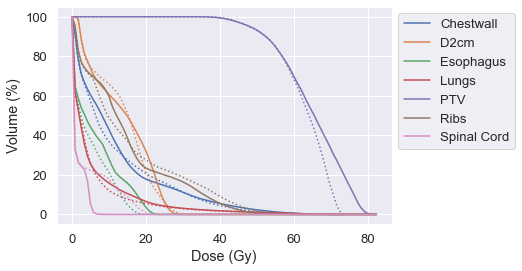

In [23]:
plotDvh() # Solid: Clinical, Dotted: Optimized, PTV D95: 4800

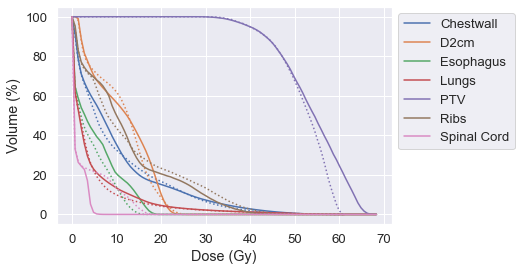

In [24]:
plotDvh(coeff) # Solid: Clinical, Dotted: Optimized, PTV D95: 3989